## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [39]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [40]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_24.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_24.csv')

In [41]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

### 인코딩 

In [42]:
Total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256342 entries, 0 to 256341
Data columns (total 78 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   시술_시기_코드                256342 non-null  object 
 1   시술_당시_나이                256342 non-null  object 
 2   임신_시도_또는_마지막_임신_경과_연수   256342 non-null  object 
 3   시술_유형                   256342 non-null  object 
 4   배란_자극_여부                256342 non-null  int64  
 5   배란_유도_유형                256342 non-null  object 
 6   단일_배아_이식_여부             256342 non-null  object 
 7   착상_전_유전_검사_사용_여부        256342 non-null  float64
 8   착상_전_유전_진단_사용_여부        256342 non-null  object 
 9   남성_주_불임_원인              256342 non-null  int64  
 10  남성_부_불임_원인              256342 non-null  int64  
 11  여성_주_불임_원인              256342 non-null  int64  
 12  여성_부_불임_원인              256342 non-null  int64  
 13  부부_주_불임_원인              256342 non-null  int64  
 14  부부_부_불임_원인          

In [43]:
Total_categorical_columns = [
    "시술_시기_코드",
    "시술_당시_나이",
    "임신_시도_또는_마지막_임신_경과_연수",
    "시술_유형",
    "배란_유도_유형",
    "단일_배아_이식_여부",
    "착상_전_유전_진단_사용_여부",
    "배아_생성_주요_이유",
    "총_생성_배아_수",
    "미세주입된_난자_수",
    "미세주입에서_생성된_배아_수",
    "이식된_배아_수",
    "미세주입_배아_이식_수",
    "저장된_배아_수",
    "미세주입_후_저장된_배아_수",
    "해동된_배아_수",
    "해동_난자_수",
    "수집된_신선_난자_수",
    "저장된_신선_난자_수",
    "혼합된_난자_수",
    "파트너_정자와_혼합된_난자_수",
    "기증자_정자와_혼합된_난자_수",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이",
    "동결_배아_사용_여부",
    "신선_배아_사용_여부",
    "기증_배아_사용_여부",
    "대리모_여부",
    "변환된_특정_시술_유형",
    "난자_채취_경과일",
    "난자_해동_경과일",
    "난자_혼합_경과일",
    "배아_이식_경과일", 
    "배아_해동_경과일"
]

In [44]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [45]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42)

### Total 데이터


--- Model Performance ---
Model Accuracy: 0.7444264565331877
Model F1 Score: 0.20166940839578382
Model AUC: 0.7386094951424671


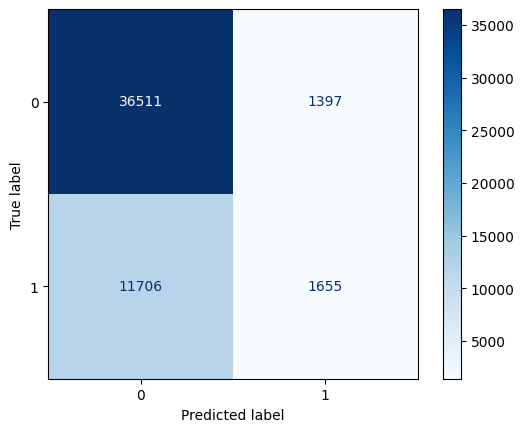

In [46]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
Total_model = lgb.LGBMClassifier(
    n_estimators=2512,  # 트리의 개수 (부스팅 반복 횟수)
    num_leaves=21,  # 하나의 트리가 가질 수 있는 최대 리프 노드 수
    max_depth=200,  # 트리의 최대 깊이 (-1이면 제한 없음)
    learning_rate=0.02523215966126037,  # 학습률 (0과 1 사이의 값)
    min_child_samples=40,  # 리프 노드가 되기 위한 최소한의 데이터 수
    subsample=0.3590277144991599,  # 각 트리를 학습할 때 사용하는 데이터 샘플링 비율
    colsample_bytree=0.33004567681069225,  # 각 트리를 학습할 때 사용하는 피처 샘플링 비율
    reg_alpha=9.81401425129951,  # L1 정규화 (Lasso) 계수
    reg_lambda=0.010624472339910946,  # L2 정규화 (Ridge) 계수
    min_split_gain=0.015521388259179621,  # 노드를 분할하기 위한 최소 손실 감소 값
    random_state=42,  # 랜덤 시드 값 (재현성을 위해 설정)
    boosting_type='gbdt',  # 부스팅 유형 ('gbdt', 'dart', 'goss', 'rf' 중 하나)
    verbose=-1  # 학습 과정의 출력을 제어 (음수이면 출력을 억제)
)

# 모델 학습
Total_model.fit(Total_X_train, Total_y_train)

# 예측
y_pred = Total_model.predict(Total_X_test)
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Total_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

데이콘 PUBLIC ??

## 제출

In [ ]:
# 모델 학습 및 예측
Total_model.fit(Total_X, Total_y)
Total_pred_proba = Total_model.predict_proba(Total_test.drop('ID', axis=1))[:, 1]
Total_test['probability'] = Total_pred_proba

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

In [ ]:
# 제출 파일 저장
submission.to_csv('../submission/code24_total_submit2.csv', index=False, encoding='utf-8')

소프트 보팅

In [ ]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code24_submit.csv')
df2 = pd.read_csv('../submission/code24_total_submit2.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 소프트 보팅하여 새로운 'probability' 열 생성
merged_df['probability'] = (merged_df['probability_df1'] + merged_df['probability_df2']) / 2

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code24_soft_voting_submit2.csv', index=False, encoding='utf-8')

In [54]:
df1.describe()

,probability
count,90067.000000
mean,0.258397
std,0.160612
min,0.000809
25%,0.138970
50%,0.271625
75%,0.380463
max,0.720828


In [53]:
df2.describe()

,probability
count,90067.000000
mean,0.258374
std,0.161596
min,0.000097
25%,0.138854
50%,0.271005
75%,0.380350
max,0.757647


In [55]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code24_submit.csv')
df2 = pd.read_csv('../submission/code24_total_submit2.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 조건에 따라 선택하여 새로운 'probability' 열 생성
def select_probability(row):
    if row['probability_df1'] > 0.35 and row['probability_df2'] > 0.35:
        return max(row['probability_df1'], row['probability_df2'])
    elif row['probability_df1'] < 0.15 and row['probability_df2'] < 0.15:
        return min(row['probability_df1'], row['probability_df2'])
    else:
        return row['probability_df1']

merged_df['probability'] = merged_df.apply(select_probability, axis=1)

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code24_soft_voting_submit2_upgrade.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.74187

In [56]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
df1 = pd.read_csv('../submission/code24_submit.csv')
df2 = pd.read_csv('../submission/code24_total_submit2.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(df1, df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 조건에 따라 선택하여 새로운 'probability' 열 생성
def select_probability(row):
    if row['probability_df1'] > 0.3 and row['probability_df2'] > 0.3:
        return max(row['probability_df1'], row['probability_df2'])
    elif row['probability_df1'] < 0.2 and row['probability_df2'] < 0.2:
        return min(row['probability_df1'], row['probability_df2'])
    else:
        return row['probability_df1']

merged_df['probability'] = merged_df.apply(select_probability, axis=1)

# 최종 제출 파일 생성
submission = merged_df[['ID', 'probability']]
submission = submission.sort_values(by='ID')

# 제출 파일 저장
submission.to_csv('../submission/code24_soft_voting_submit2_upgrade2.csv', index=False, encoding='utf-8')

데이콘 PUBLIC 0.7416698807

In [65]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
xx_df1 = pd.read_csv('../submission/code24_submit.csv')
xx_df2 = pd.read_csv('../submission/code24_soft_voting_submit2_upgrade.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(xx_df1, xx_df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 비교합니다.
comparison = merged_df['probability_df1'] == merged_df['probability_df2']

# 차이점이 있는 행을 출력합니다.
differences = merged_df[~comparison]

# differences 데이터셋의 길이를 출력합니다.
print(len(differences))

28668


In [66]:
import pandas as pd

# 두 CSV 파일을 읽어옵니다.
xx_df1 = pd.read_csv('../submission/code24_submit.csv')
xx_df2 = pd.read_csv('../submission/code24_soft_voting_submit2_upgrade2.csv')

# ID를 기준으로 병합합니다.
merged_df = pd.merge(xx_df1, xx_df2, on='ID', suffixes=('_df1', '_df2'))

# 'probability' 열을 비교합니다.
comparison = merged_df['probability_df1'] == merged_df['probability_df2']

# 차이점이 있는 행을 출력합니다.
differences = merged_df[~comparison]

# differences 데이터셋의 길이를 출력합니다.
print(len(differences))

37267


.